In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# -------------------------------
# 1. Load a Dataset Using NumPy
# -------------------------------
# Provide the correct path to the CSV file in Google Drive
file_path = '/content/drive/My Drive/bodyPerformance.csv'

# Load a CSV file. Adjust the path as needed.
data =pd.read_csv(file_path)

# Select only numeric columns for computations
numeric_data = data.select_dtypes(include=np.number)

# 1.1 Measure of Central Tendency
# Selecting relevant numerical columns for analysis
numeric_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

# Mean
mean_values = data[numeric_columns].mean()

# Geometric Mean (ignoring negative and zero values as they are not valid for geometric mean)
geom_mean_values = data[numeric_columns].apply(lambda x: stats.gmean(x[x > 0]))

# Harmonic Mean (ignoring negative and zero values)
harmonic_mean_values = data[numeric_columns].apply(lambda x: stats.hmean(x[x > 0]))

# Mode
mode_values = data[numeric_columns].mode().iloc[0]

# Median
median_values = data[numeric_columns].median()

# Central Tendency Results
central_tendency = pd.DataFrame({
    'Mean': mean_values,
    'Geometric Mean': geom_mean_values,
    'Harmonic Mean': harmonic_mean_values,
    'Mode': mode_values,
    'Median': median_values
})

print("Central Tendency:\n", central_tendency)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Central Tendency:
                                Mean  Geometric Mean  Harmonic Mean   Mode  \
age                       36.775106       34.424320      32.353786   21.0   
height_cm                168.559807      168.347322     168.132928  170.0   
weight_kg                 67.447316       66.393593      65.340589   70.5   
body fat_%                23.240165       22.053450      20.766092   23.1   
diastolic                 78.796842       78.037507      77.170969   80.0   
systolic                 130.234817      129.399526     128.497464  120.0   
gripForce                 36.963877       35.331552      33.512292   43.1   
sit and bend forward_cm   15.209268       14.264080       9.153939   20.0   
sit-ups counts            39.771224       36.779054      30.116930   45.0   
broad jump_cm            190.129627      185.662310     180.294921  211.0   

    

In [4]:
import pandas as pd
import numpy as np

# Assuming 'data' has been loaded and 'numeric_columns' is already defined
numeric_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

# Variance
variance_values = data[numeric_columns].var()

# Standard Deviation
std_dev_values = data[numeric_columns].std()

# Skewness
skewness_values = data[numeric_columns].skew()

# Interquartile Range (IQR)
iqr_values = data[numeric_columns].quantile(0.75) - data[numeric_columns].quantile(0.25)

# Range
range_values = data[numeric_columns].max() - data[numeric_columns].min()

# Mean Absolute Deviation (MAD)
mad_values = data[numeric_columns].apply(lambda x: np.mean(np.abs(x - np.mean(x))))

# Dispersion Results
dispersion = pd.DataFrame({
    'Variance': variance_values,
    'Standard Deviation': std_dev_values,
    'Skewness': skewness_values,
    'IQR': iqr_values,
    'Range': range_values,
    'MAD': mad_values
})
print("Dispersion:\n", dispersion)


Dispersion:
                             Variance  Standard Deviation  Skewness   IQR  \
age                       185.658051           13.625639  0.599896  23.0   
height_cm                  71.007293            8.426583 -0.186882  12.4   
weight_kg                 142.794526           11.949666  0.349805  17.1   
body fat_%                 52.661786            7.256844  0.361132  10.0   
diastolic                 115.391275           10.742033 -0.159637  15.0   
systolic                  216.500428           14.713954 -0.048654  21.0   
gripForce                 112.887736           10.624864  0.018456  17.7   
sit and bend forward_cm    71.515386            8.456677  0.785492   9.8   
sit-ups counts            203.824115           14.276698 -0.467830  20.0   
broad jump_cm            1589.457435           39.868000 -0.422623  59.0   

                         Range        MAD  
age                       43.0  11.844362  
height_cm                 68.8   6.919084  
weight_kg         

In [8]:

correlation_matrix = data[numeric_columns] . corr()

print("Corre1ation Matrix:\n",correlation_matrix)

Corre1ation Matrix:
                               age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   
gripForce               -0.179583   0.735024   0.700119   -0.541788   
sit and bend forward_cm -0.070033  -0.221970  -0.296249   -0.071225   
sit-ups counts          -0.544581   0.500424   0.294899   -0.608912   
broad jump_cm           -0.435172   0.674589   0.479564   -0.673273   

                         diastolic  systolic  gripForce  \
age                       0.158508  0.211167  -0.179583   
height_cm                 0.145933  0.210186   0.735024   
weight_kg           

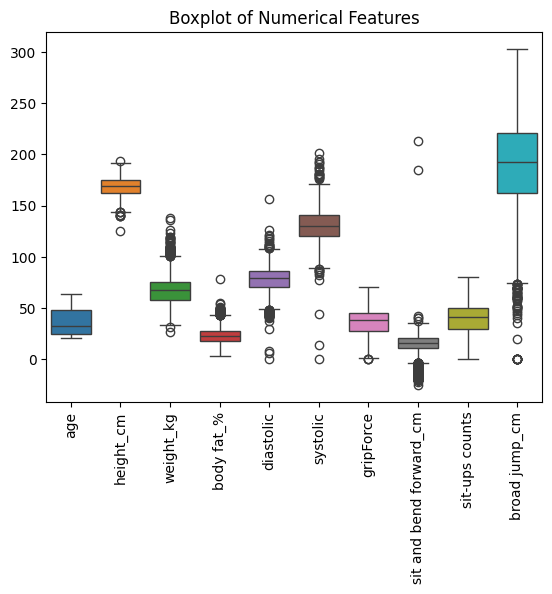

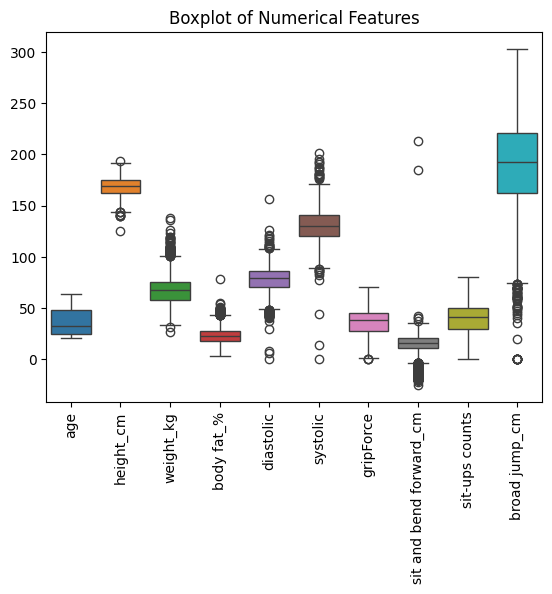

In [9]:
# Boxplot for each numerical feature
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()# Boxplot for each numerical feature
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

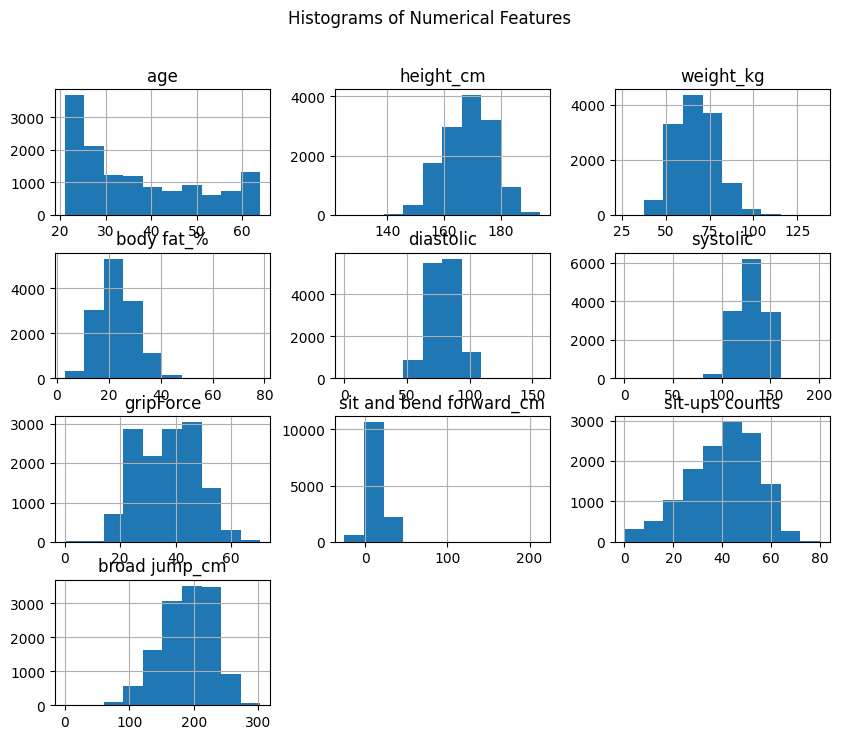

In [10]:
# Histogram for each feature
data[numeric_columns].hist(figsize=(10, 8), bins=10)
plt.suptitle('Histograms of Numerical Features')
plt.show()

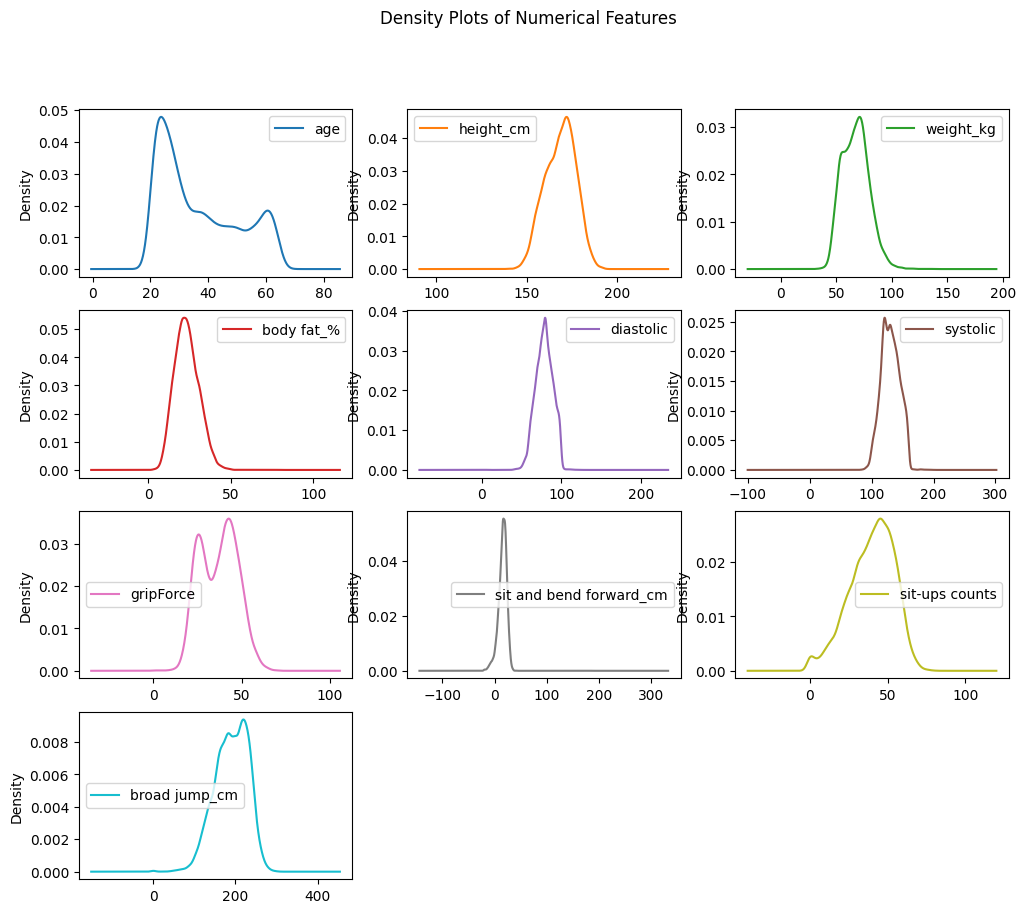

In [11]:
# Density Plot for each feature
data[numeric_columns].plot(kind='density', subplots=True, layout=(4,3), figsize=(12,10), sharex=False)
plt.suptitle('Density Plots of Numerical Features')
plt.show()


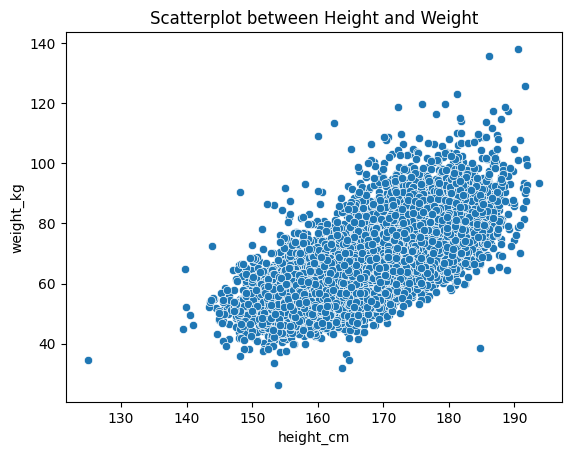

In [18]:
# Scatterplot between 'height_cm' and 'weight_kg '
sns.scatterplot(x= 'height_cm' , y='weight_kg', data=data)
plt.title( 'Scatterplot between Height and Weight' )
plt.show( )

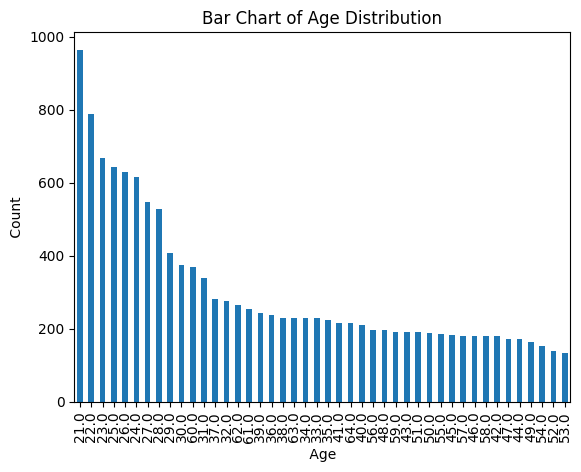

In [22]:
# Bar chart of Value Counts for 'age' (or any other column)
data[ 'age' ] . value_counts() . plot(kind= 'bar')
plt.title( 'Bar Chart of Age Distribution' )
plt.xlabel( ' Age ' )
plt.ylabel( ' Count ' )
plt.show()